<a href="https://colab.research.google.com/github/TMA040685/Togturen/blob/main/Accelerations_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 - Installer Google drive i Google Colab
Det første du skal gøre er at aktiverer google drev i colab det er nemt og det kan gøres på følgende vis.

1. klik på mappe ikonet til venstre
2. Vent på at *runtime* initialiseres ... Du vil se ikoner dukker op under ordet ***Filer*** i side menuen.
3. Vælg Google Drev ikonet (mouse over teksten er *Mount Drive*)

Godkend eventuelle advarsler.

Lav nu en mappe med din/dine datafiler i husk det skal være dine CSV-filer ikke zip-filer og naviger til den.

Når du står i mappen kan du markere en fil og klikke på de 3 prikker ud for filnavnet og vælge ***kopier sti*** dette vil give dig siten til filen som du får brug for senere.

# 1 - Introduktion til data analyse af phyphox data
I denne notesbog finder du et eksempel på hvordan man kan indlæse en CSV-fil med data fra fx **Phyphox**.
Efterfølgende kan man så udfører databehandling til fx at bestemme en hastigheds graf eller måske en sted-funktion på baggrund af de indsamlede data.

Det første du skal gøre er at indlæse de nødvendige *biblioteker* dette gåres som vist herunder

Der findes som udgangspunkt to måder at indlæse biblioteker i Python enten kan man inlæse et helt bibliotek dette gøres således:
```
import pandas as pd
```
her skrives først *import* for at tilkendegive at man ønsker at indlæse et bibliotek herefter angives bibliotekets navn i dette tilfælde **pandas** og til sidst angives at vi ønsker at det skal kaldes *pd* hvilket betyder at vi kan kalde elementer fra **pandas** ved at skrive ***pd.DataFrame()*** når vi ønsker at anvende elementet *DataFrame()* fra pandas.

Den anden måde at indlæse noget er hvis vi ikke skal bruge et helt bibliotek men blot et enkelt element så kan vi indlæse dette på følgende måde:
```
from pathlib import Path
```
Denne komando skal læses bagfra altså *importer* elementet **Path** fra biblioteket **pathlib**. Dette element vil ikke få en selvstændig betegenlse som fx pandas fra eksemplet før fik men kan derimod blot kaldes ved at skrive ***path()***




## 1.1 - Eksempel på indlæsning af biblioteker
Herunder følger et eksempel på de mest gængse biblioteker som vi altid bør indlæse.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Linjen herunder gør det let at plotte grafer
%matplotlib inline

# 2 - Indlæs en datafil
I dette afsnit indlæses en datafil. Filen kan enten uploades til Colab eller placeres i en mappe i Google-drev der efterfølgende forbindes til Colab. Herefter kan man med pakken **Pandas** nemt indlæse filen som en datatabel.

En datafil fx i CSV-format kan indlæses på følgende måde
```
df = pd.read_csv('sti_til_fil/filnavn')
```
her er **df** det navn som vores datatabel vil have resten af tiden, når man indlæser filen er standarden at søjler adskildes af komma. Dette kan man dog lave om ved at tilføje argumentet **sep=';'** således at udtrykket ovenfor bliver
```
df = pd.read_csv('sti_til_fil/filnavn', sep=';')
```
Det er muligt at tjekke de data vi har indlæst ved at skrive
```
df.head()
```
herved vil Python udskrive de første 5 linjer fra datasættet.




## 2.1 - Eksempel på indlæsning af CSV-fil
Indlæs nu din fil som vist her.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Acceleration_Test/Med_g/RawData.dat')
df.head()

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.026876,0.803853,-0.420182,9.728839,9.771031
1,0.028886,0.784700,-0.429759,9.752781,9.793732
2,0.030897,0.799065,-0.424971,9.747993,9.789916
3,0.032908,0.827795,-0.420182,9.771935,9.815931
4,0.034919,0.837372,-0.420182,9.795877,9.840576


# 3 - Plot dine grafer
Når vi skal plotte vores grafer skal vi anvende *matplotlib* der er et bibliotek med særlige plotte funktioner. Dette kan gøres på mange måde vi begynder med at lave en simpel figur. Der viser en af vores accelerations kurver.

Bemærk syntaksen her, først laves en figur med **plt.figure()** efterfølgende defineres et plot hvor vi angiver vores *x-data* og vores *y-data* fra vores datatabel i pandas og sluttelig angives farven til en rød streg med *r-* og at den skal have en linjetykkelse på 1 med *lw=1*. Det sidste argument i plot linjen angiver at linjen skal være halv-gennemsigtig.

De efterfølgende komandoer angiver hvad der skal stå på akserne *xlabel* og *ylabel* mens *xlim* og *ylim* angiver grænserne for plot vinduet.



## 3.1 - Eksempel på et simpelt plot
Se koden til det simple plot her

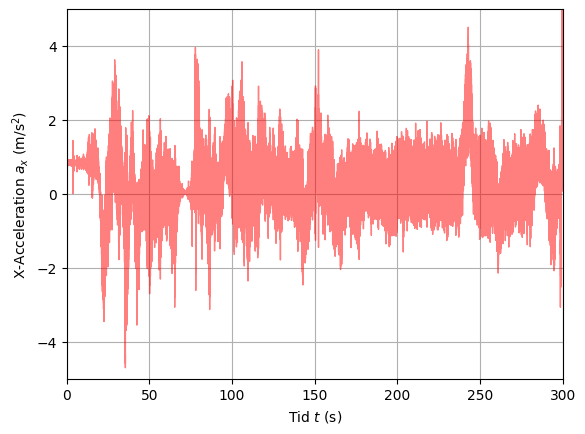

In [66]:
# Skab en figur
plt.figure()
# plot et udplut af din dataframe
plt.plot(df['Time (s)'], df['Acceleration x (m/s^2)'], 'r-', lw=1, alpha=.5)
# angiv en titel til x-aksen
plt.xlabel("Tid $t$ (s)")
# angiv en titel til y-aksen
plt.ylabel("X-Acceleration $a_x$ (m/s$^2$)")
# set grænserne for din x-akse
plt.xlim([0,300])
# set grænserne for din y-akse
plt.ylim([-5,5])
# tegn et gitter bag dine data
plt.grid(True)

## 3.2 - en mere advanceret figur
Figuren ovenfor er måske meget fin men det er noget bøvl med alle de figurer vi vil få i vores SRO hvis vi plotter alle vores figurer på denne måde derfor laver vi nu en mere advanceret figur med tre vinduer i en. Således at vi har et vindue pr akse i vores accelerations data.

Dette er lidt sværere da vi skal kode flere akser i figuren men tænk på det som **axs[0]** er det øverste vindue **axs[1]** er det midterste vindue og **axs[2]** er vinduet i bunden. Du kan finde et eksempel på hvordan figuren bygges herunder.

### 3.2.1 - Eksempel kode:

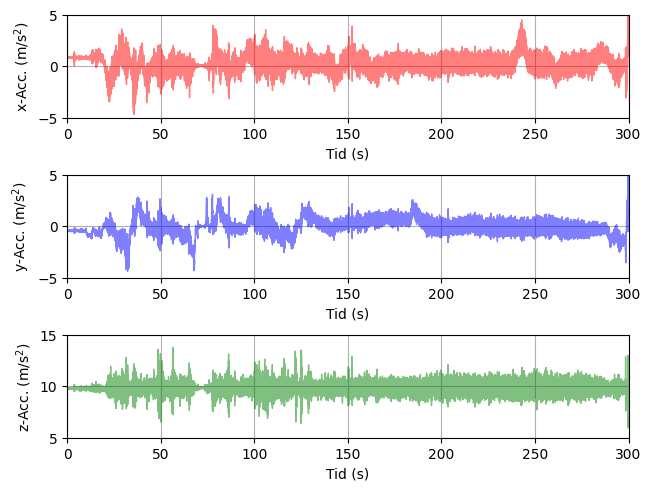

In [56]:
fig, axs = plt.subplots(3,1, layout='constrained')
axs[0].plot(df['Time (s)'], df['Acceleration x (m/s^2)'], 'r-', lw=1, alpha=.5)
axs[0].set_xlim(0,300)
axs[0].set_ylim(-5,5)
axs[0].set_xlabel('Tid (s)')
axs[0].set_ylabel('x-Acc. (m/s$^2$)')
axs[0].grid(True)

axs[1].plot(df['Time (s)'], df['Acceleration y (m/s^2)'], 'b-', lw=1, alpha=.5)
axs[1].set_xlim(0,300)
axs[1].set_ylim(-5,5)
axs[1].set_xlabel('Tid (s)')
axs[1].set_ylabel('y-Acc. (m/s$^2$)')
axs[1].grid(True)

axs[2].plot(df['Time (s)'], df['Acceleration z (m/s^2)'], 'g-', lw=1, alpha=.5)
axs[2].set_xlim(0,300)
axs[2].set_ylim(5,15)
axs[2].set_xlabel('Tid (s)')
axs[2].set_ylabel('z-Acc. (m/s$^2$)')
axs[2].grid(True)

### Linjen herunder tilader dig at gennem din figur som en fil.
fig.savefig('/content/drive/MyDrive/Acceleration_Test/Med_g/orig_data.png', dpi=300)



Nu da vi har figuren på plads og den er sikkert gemt er det tid til at se om vi kan oprense vores data en anelse. Dette gøres gennem en fitrering af vores målte data.

# 4 - Filtrering af data
Nu skal vi prøve om vi kan rense vores data for noget af den støj der er at finde på vores målinger til det vil vi anvende en algoritme som hedder ***Savitzky-Golay***. Ideen her er at ganske simpel. For hvert datapunkt vil vi gøre følgende.
1. Vælg et vindue (fx 5 punkter) omkring punktet
2. Fit et polynomium til de valgte punkter i vinduet
3. Erstat værdien for datapunktet med den tilhørende værdi fra det fittede polynomium.

For at gøre dette skal vi starte med at indlæse nogle flere biblioteker


## 4.1 - Indlæs biblioteker

In [18]:
from scipy.signal import savgol_filter, general_gaussian

Som det næste skal vi nu oprette vektoerer med de data vi har tilrådighed.

## 4.2 - Opret vektorer med data

In [54]:
t = df['Time (s)'].values
acx = df['Acceleration x (m/s^2)'].values
acy = df['Acceleration y (m/s^2)'].values
acz = df['Acceleration z (m/s^2)'].values
np.shape(t)

(149657,)

## 4.3 - Filtrering af data med Savvitzky-Golay filteret
Nu da du har indlæst dine data i vektorer kan vi begynde at rense dem for støj. For at kunne gøre dette skal vi bestemme os for hvor mange punter vores vindue skal dække over.
Jeres datasæt er sandsynligvis meget store I kan få en ide om hvor stort det er ved at skrive

```
np.shape(t)
```
så vil python returnere længden af vektoren som vist ovenfor jeg har ca. 150000 punkter i min vektor. Derfor vælger jeg at sætte mit vindue højt

$$ 0 \leq w \leq 1000$$

her er $w$ viduet med alle de datapunkter viste $w = 500$ at være optimalt. Det næste jeg skal gøre er at angive den orden det polynomium der skal fittes med skal have jeg har valgt et anden ordens polynomium $p = 2$ hvilket betyder at der fittes til funktionen
$$ p = a\cdot x^2 + b\cdot x + c$$
på de 500 valgte punkter i mit vinude. Jeg er nu klar til at aktiverer mit filter hvilket gøres med:
```
x = savgol_filter(data, vindue, polyorder = 2, deriv = 0)
```
På denne måde kan vi altså beregne en ny vektor med data der har mindre støj en det oprindelige datasæt.



In [39]:
w = 500
p = 2
asx = savgol_filter(acx, w, polyorder= p, deriv = 0)
asy = savgol_filter(acy, w, polyorder= p, deriv = 0)
asz = savgol_filter(acz, w, polyorder= p, deriv = 0)

## 4.4 - Plot de nye data
Herunder ses koden til figuren som plotter de nye data oven på de gamle data - her kan du også se ca. hvordan du skal forvente at dine data ser ud.


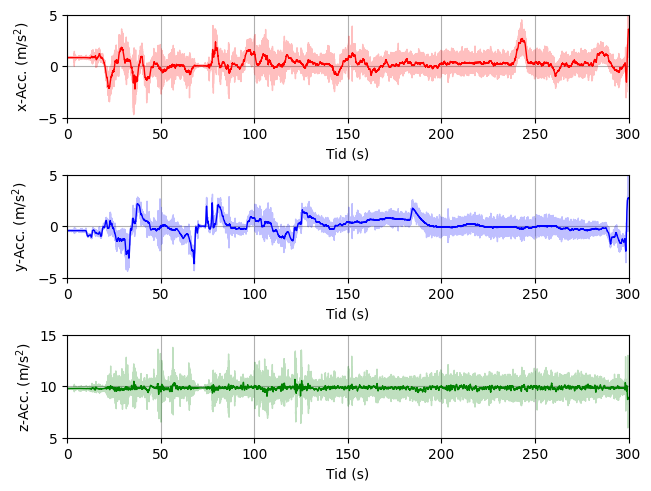

In [67]:
fig, axs = plt.subplots(3,1, layout='constrained')
axs[0].plot(t, acx, 'r-', lw=1, alpha=.25)
axs[0].plot(t,asx, 'r-', lw=1)
axs[0].set_xlim(0,300)
axs[0].set_ylim(-5,5)
axs[0].set_xlabel('Tid (s)')
axs[0].set_ylabel('x-Acc. (m/s$^2$)')
axs[0].grid(True)

axs[1].plot(t, acy, 'b-', lw=1, alpha=.25)
axs[1].plot(t, asy, 'b-', lw=1)
axs[1].set_xlim(0,300)
axs[1].set_ylim(-5,5)
axs[1].set_xlabel('Tid (s)')
axs[1].set_ylabel('y-Acc. (m/s$^2$)')
axs[1].grid(True)

axs[2].plot(t, acz, 'g-', lw=1, alpha=.25)
axs[2].plot(t, asz, 'g-', lw=1)
axs[2].set_xlim(0,300)
axs[2].set_ylim(5,15)
axs[2].set_xlabel('Tid (s)')
axs[2].set_ylabel('z-Acc. (m/s$^2$)')
axs[2].grid(True)

### Linjen herunder tilader dig at gennem din figur som en fil.
fig.savefig('/content/drive/MyDrive/Acceleration_Test/Med_g/orig_data_smooth.png', dpi=300)

## 4.5 - Plot kun med de nye data
herunder ses koden til en figur som kun indeholder de filtererede data.

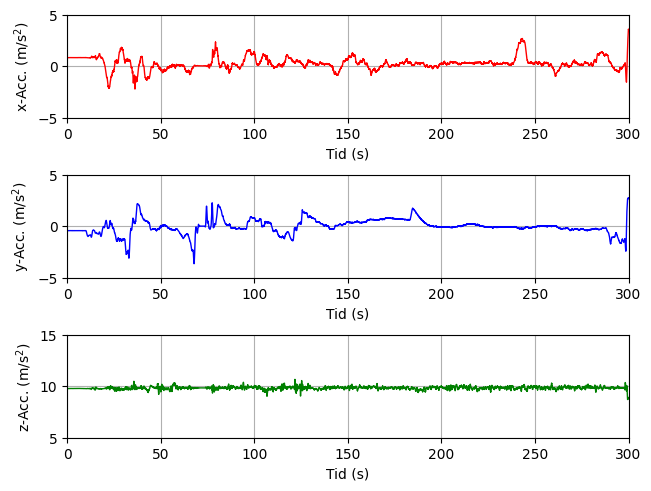

In [58]:
fig, axs = plt.subplots(3,1, layout='constrained')

axs[0].plot(t,asx, 'r-', lw=1)
axs[0].set_xlim(0,300)
axs[0].set_ylim(-5,5)
axs[0].set_xlabel('Tid (s)')
axs[0].set_ylabel('x-Acc. (m/s$^2$)')
axs[0].grid(True)


axs[1].plot(t, asy, 'b-', lw=1)
axs[1].set_xlim(0,300)
axs[1].set_ylim(-5,5)
axs[1].set_xlabel('Tid (s)')
axs[1].set_ylabel('y-Acc. (m/s$^2$)')
axs[1].grid(True)


axs[2].plot(t, asz, 'g-', lw=1)
axs[2].set_xlim(0,300)
axs[2].set_ylim(5,15)
axs[2].set_xlabel('Tid (s)')
axs[2].set_ylabel('z-Acc. (m/s$^2$)')
axs[2].grid(True)

### Linjen herunder tilader dig at gennem din figur som en fil.
fig.savefig('/content/drive/MyDrive/Acceleration_Test/Med_g/new_data.png', dpi=300)

# 5 - Byg en ny data tabel
For at kunne gemme de nye beregnede data, som er renset for støj skal vi først bygge en data tabel. Dette kan gøres på følgende måde
```
d = {'Søjle navn 1' : søjle data 1, 'Søjle navn 2' : søjle data 2 ... 'Søjle navn n' : søjle data n}  
```
det næste vi skal gøre er at skabe et ***pandas dataframe*** på baggrund af den datatabel vi lige har lavet dette gøres på følgende måde

```
data = pd.DataFrame(data=datatabel)
```
**data** bliver herved navnet på det nye dataframe mens datatabel henviser til den tabel vi lige har lavet *brug det samme navn*!



## 5.1 - Eksempel på en ny datatabel
Som vist herunder

In [60]:
nd = {'t': t, 'ax': asx, 'ay' : asy, 'az' : asz}
ndata = pd.DataFrame(data=nd)


,t,ax,ay,az
0,0.026876,0.844021,-0.430915,9.771529
1,0.028886,0.843966,-0.430925,9.771558
2,0.030897,0.843911,-0.430934,9.771588
3,0.032908,0.843857,-0.430943,9.771618
4,0.034919,0.843802,-0.430951,9.771647
...,...,...,...,...
149652,300.489106,4.074121,3.157075,8.074878
149653,300.491113,4.074965,3.160010,8.067994
149654,300.493121,4.075800,3.162954,8.061081
149655,300.495129,4.076625,3.165909,8.054140


# 6 - At gemme de nye data
Nu da du har lavet en ny data tabel skal du også have gemt dine data - så du altid kan finde dem igen. Dette kan gøres på følgende måde - hvis du har dit GoogleDrev tilkoblet.

Først indlæses elementet **Path** fra biblioteket *pathlib*
```
from pathlib import Path
```
Herefter angives stien til filen med den nye fils navn til sidst fx.
```
filepath = Path('/sti_til_mappe/filnavn.csv')
```
Nu ønsker vi at tjekke om mappen eksisterer, hvis ikke skal den oprettes.
```
filepath.parent.mkdir(parents=True, exist_ok=True)
```
Herefter kan vi gemme vores nye csv-fil ved at skrive
```
data.to_csv(filepath)
```
her er data navnet på vores nye Pandas dataframe og filepath henviser til den placering og det filnavn som vi angav lige før. Når denne kode afvikles vil den generere en ny fil på den ønskede placering med de nye data.



## 6.1 - Eksempel på at gemme data
Dette vil gemme dine data som en CSV-fil på den placering du har angivet.

In [61]:
from pathlib import Path
filepath = Path('/content/drive/MyDrive/Acceleration_Test/Med_g/new_data.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
ndata.to_csv(filepath)

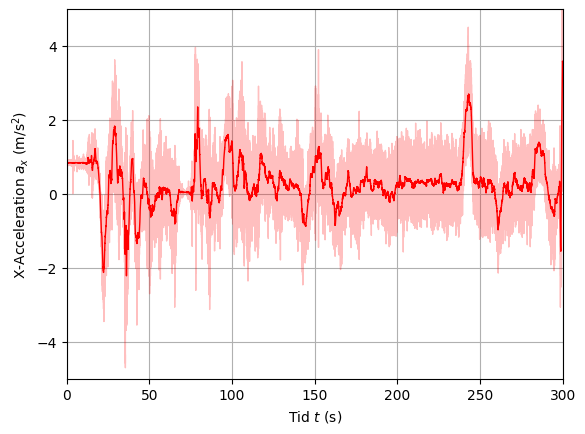

In [69]:
# Skab en figur
plt.figure()
# plot et udplut af din dataframe
plt.plot(df['Time (s)'], df['Acceleration x (m/s^2)'], 'r-', lw=1, alpha=.25)
plt.plot(t,asx, 'r-', lw=1)
# angiv en titel til x-aksen
plt.xlabel("Tid $t$ (s)")
# angiv en titel til y-aksen
plt.ylabel("X-Acceleration $a_x$ (m/s$^2$)")
# set grænserne for din x-akse
plt.xlim([0,300])
# set grænserne for din y-akse
plt.ylim([-5,5])
# tegn et gitter bag dine data
plt.grid(True)